In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.utils import shuffle
import re
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [2]:
n_samples = 2000
n_features = 1000
n_components = 20
n_top_words = 20

In [3]:
# Load the full dataset 
dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), shuffle = True)
dataset.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
def text_clean(news):
    # Tokenize
    word_list = word_tokenize(news)
    
    # stop words
    stopwords_list = set(stopwords.words('english'))
    
    # remove stop words
    word_list = [word for word in word_list if word not in stopwords_list]
    
    # remove very small words, length < 3 as they don't contribute any useful information
    word_list = [word for word in word_list if len(word) > 2]
    
    # lemmatize
    lemma = WordNetLemmatizer()
    word_list = [lemma.lemmatize(word) for word in word_list]
    
    # list to sentence
    sentence = ' '.join(word_list)
    
    return sentence

### Exploratory Data Analysis

In [5]:
# preview of training data
news_df = pd.DataFrame({'News': dataset.data,
                        'Target': dataset.target})
news_df.head()

,News,Target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4


In [6]:
# size of the entire dataset
news_df.shape

(18846, 2)

In [7]:
# getting the target name into the dataset
news_df['Target_name'] = news_df['Target'].apply(lambda x: dataset.target_names[x])
news_df.head()

,News,Target,Target_name
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware


Text(0.5, 0, 'Count of News Articles')

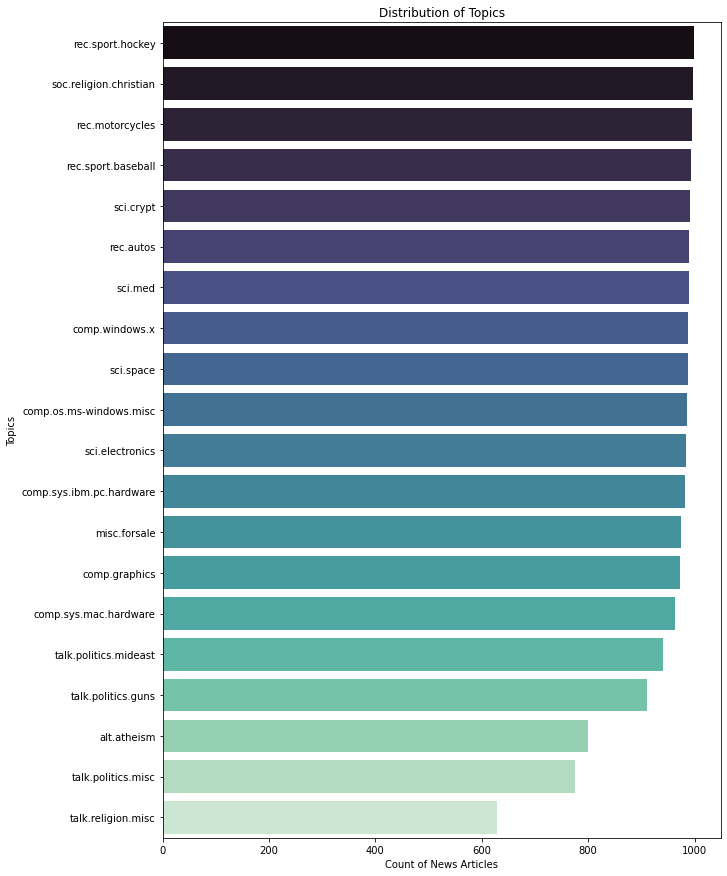

In [8]:
# plot the distribution of news topics
fig = plt.figure(figsize=[10,15])
ax = sns.countplot(y=news_df['Target_name'], palette='mako', order=news_df['Target_name'].value_counts().index)
plt.title('Distribution of Topics')
plt.ylabel('Topics')
plt.xlabel('Count of News Articles')

In [9]:
# any null value in the table
news_df.isna().sum()

News           0
Target         0
Target_name    0
dtype: int64

* The full dataset is consisted of 18846 news articles.
* The dataset has no null values 
* There are a total of 20 topics in this dataset.

In [10]:
# getting only the text data
pattern = re.compile(r'[^A-Za-z]+')
text_data = news_df['News'].str.replace(pattern, ' ', regex=True).str.strip()
text_data.head()

0    I am sure some bashers of Pens fans are pretty...
1    My brother is in the market for a high perform...
2    Finally you said what you dream about Mediterr...
3    Think It s the SCSI card doing the DMA transfe...
4    I have an old Jasmine drive which I cannot use...
Name: News, dtype: object

In [11]:
# using the function text_clean to get the meaningful words
processed_text_data = text_data.apply(lambda x: text_clean(x))
processed_text_data.head()

0    sure bashers Pens fan pretty confused lack kin...
1    brother market high performance video card sup...
2    Finally said dream Mediterranean That new The ...
3    Think SCSI card DMA transfer NOT disk The SCSI...
4    old Jasmine drive use new system understanding...
Name: News, dtype: object

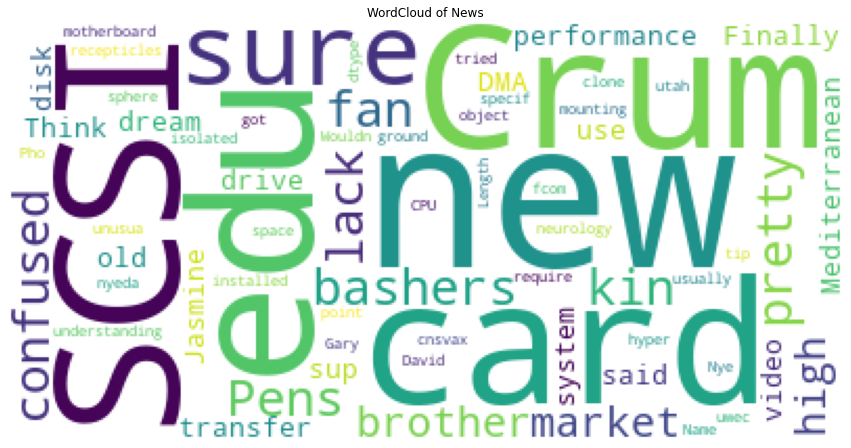

In [12]:
# plot word count for news text
wordcloud = WordCloud(background_color='white',
                      max_words=200).generate(str(processed_text_data))
fig = plt.figure(figsize=[15,15])
plt.title('WordCloud of News')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [13]:
# the length of the news description
description_len = news_df['News'].str.len()
description_len.describe()

count     18846.000000
mean       1169.667516
std        3858.748875
min           0.000000
25%         234.000000
50%         489.000000
75%         979.000000
max      158791.000000
Name: News, dtype: float64

In [14]:
sampled_text_data = shuffle(processed_text_data, n_samples=n_samples, random_state=12345)

In [15]:
# tf-idf on the news content and the key word of the content 
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf_matrix = vectorizer.fit_transform(sampled_text_data)
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# max_tfidf_indices = tfidf_df.idxmax(axis=1)
# title_tfidf = pd.DataFrame({'news':processed_text_data, 'key_word':max_tfidf_indices})
# title_tfidf.head()

In [16]:
sampled_text_data

14568    Awesome home record need remember game last ye...
13493    made mind Waco sure seems group devoted govern...
7682                                Oops meant fair unfair
18520    Could anyone post game summary Sabres Bruins game
14022    Every bit fast dirtbike right terrain And eat ...
                               ...                        
5669     Heed man warning get carb cleaner strong hand ...
11798    selling Global Village Teleport bps modem send...
16636    Quoting dougb ec comm mot com article Apr lmps...
4225     Here press release Reserve Officers Associatio...
10709    wondering exercise specific particular region ...
Name: News, Length: 2000, dtype: object

In [17]:
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tf_matrix = tf_vectorizer.fit_transform(sampled_text_data)

In [18]:
# all of the data need to be splitted into train and test data
# the original unprocessed data: news_df 
# the processed data: 
    # news_df['processed_news'] = processed_text_data.str.lower()

In [26]:
tf_matrix_full = tf_vectorizer.fit_transform(processed_text_data)

In [19]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from tensor_lda.tensor_lda import TensorLDA

In [20]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [21]:
lda_normal = LDA(n_components=20)
lda_normal.fit(tf_matrix)

LatentDirichletAllocation(n_components=20)

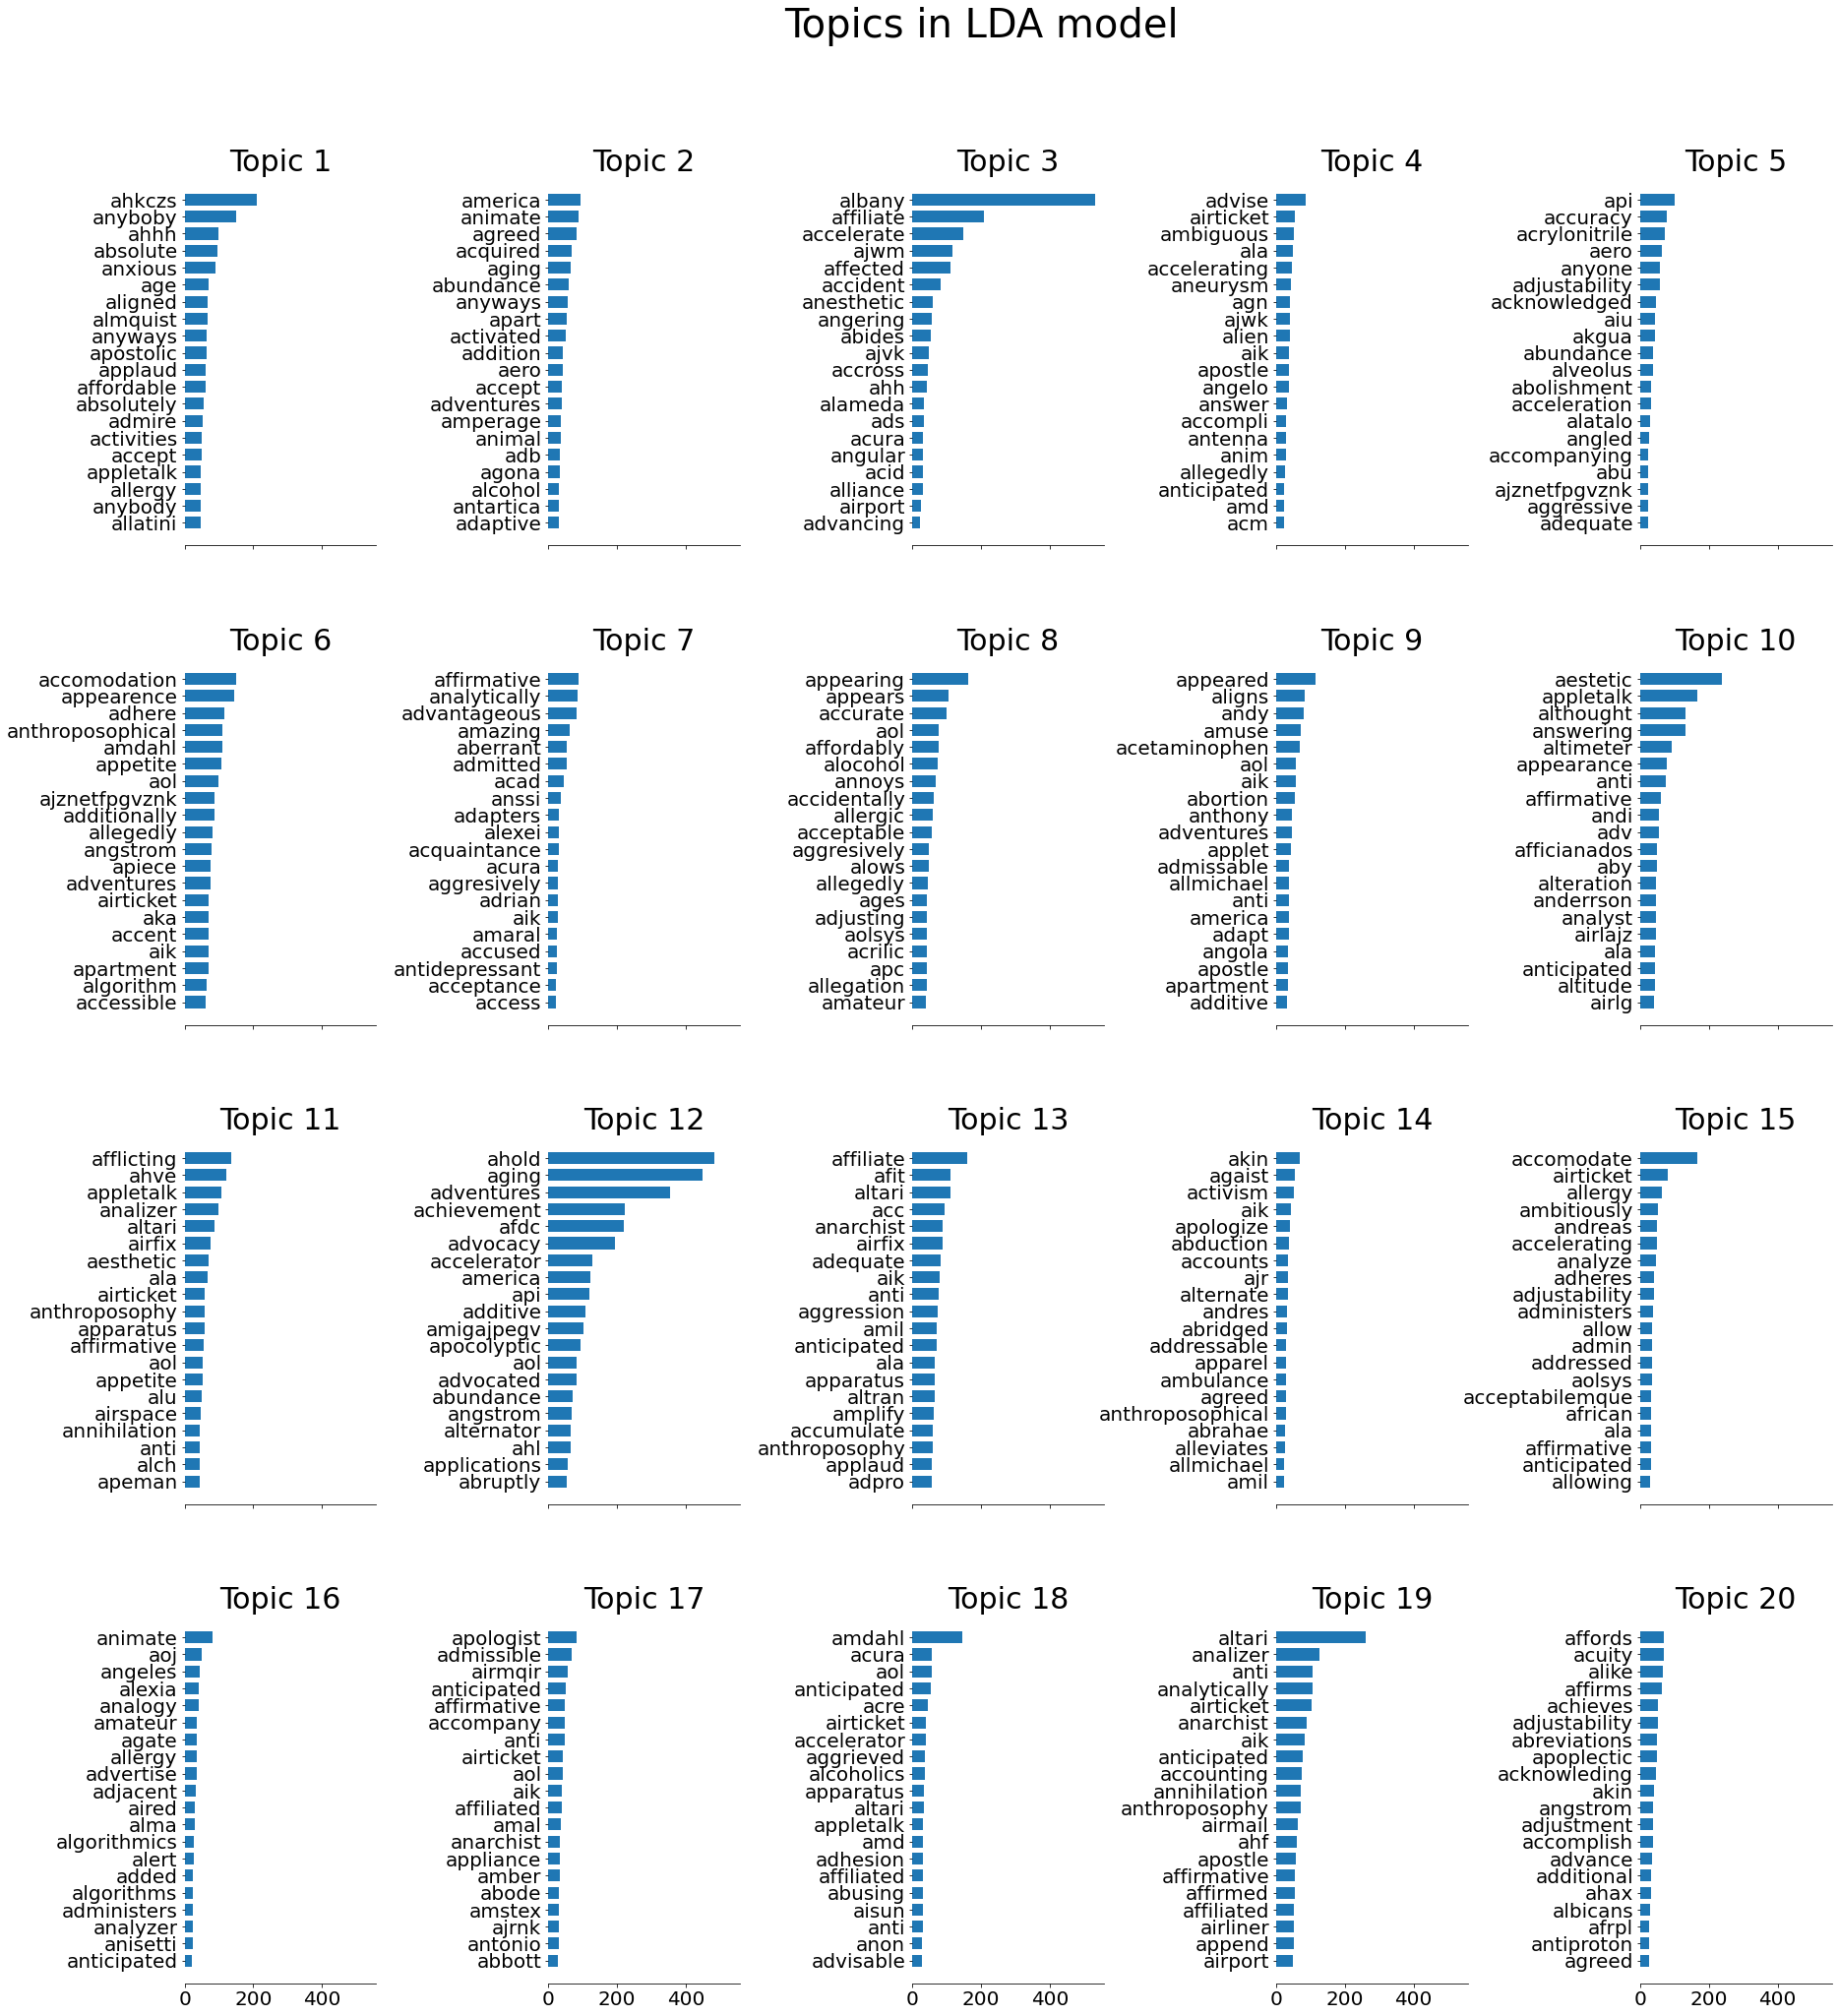

In [22]:
tf_feature_names = np.array(vectorizer.get_feature_names_out())
plot_top_words(lda_normal, tf_feature_names, n_top_words, "Topics in LDA model")

/Users/arianeyu/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


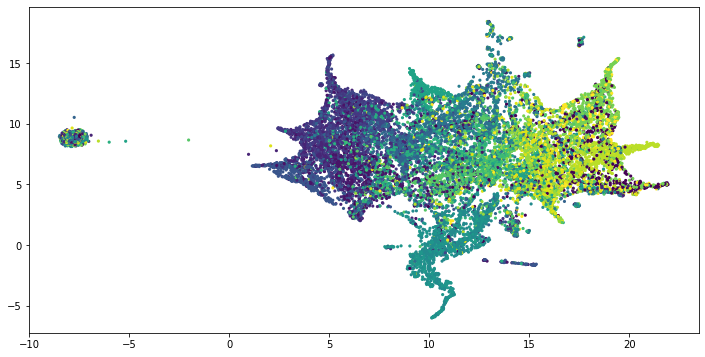

In [27]:
import umap 
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(lda_normal.fit_transform(tf_matrix_full)) 
plt.figure(figsize=(12,6)) 
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target, 
s = 10, # size 
edgecolor='none' ) 
plt.show()

In [28]:
lda_tensor = TensorLDA(n_components=20, alpha0=.1)
lda_tensor.fit(tf_matrix)

TensorLDA(n_components=20)

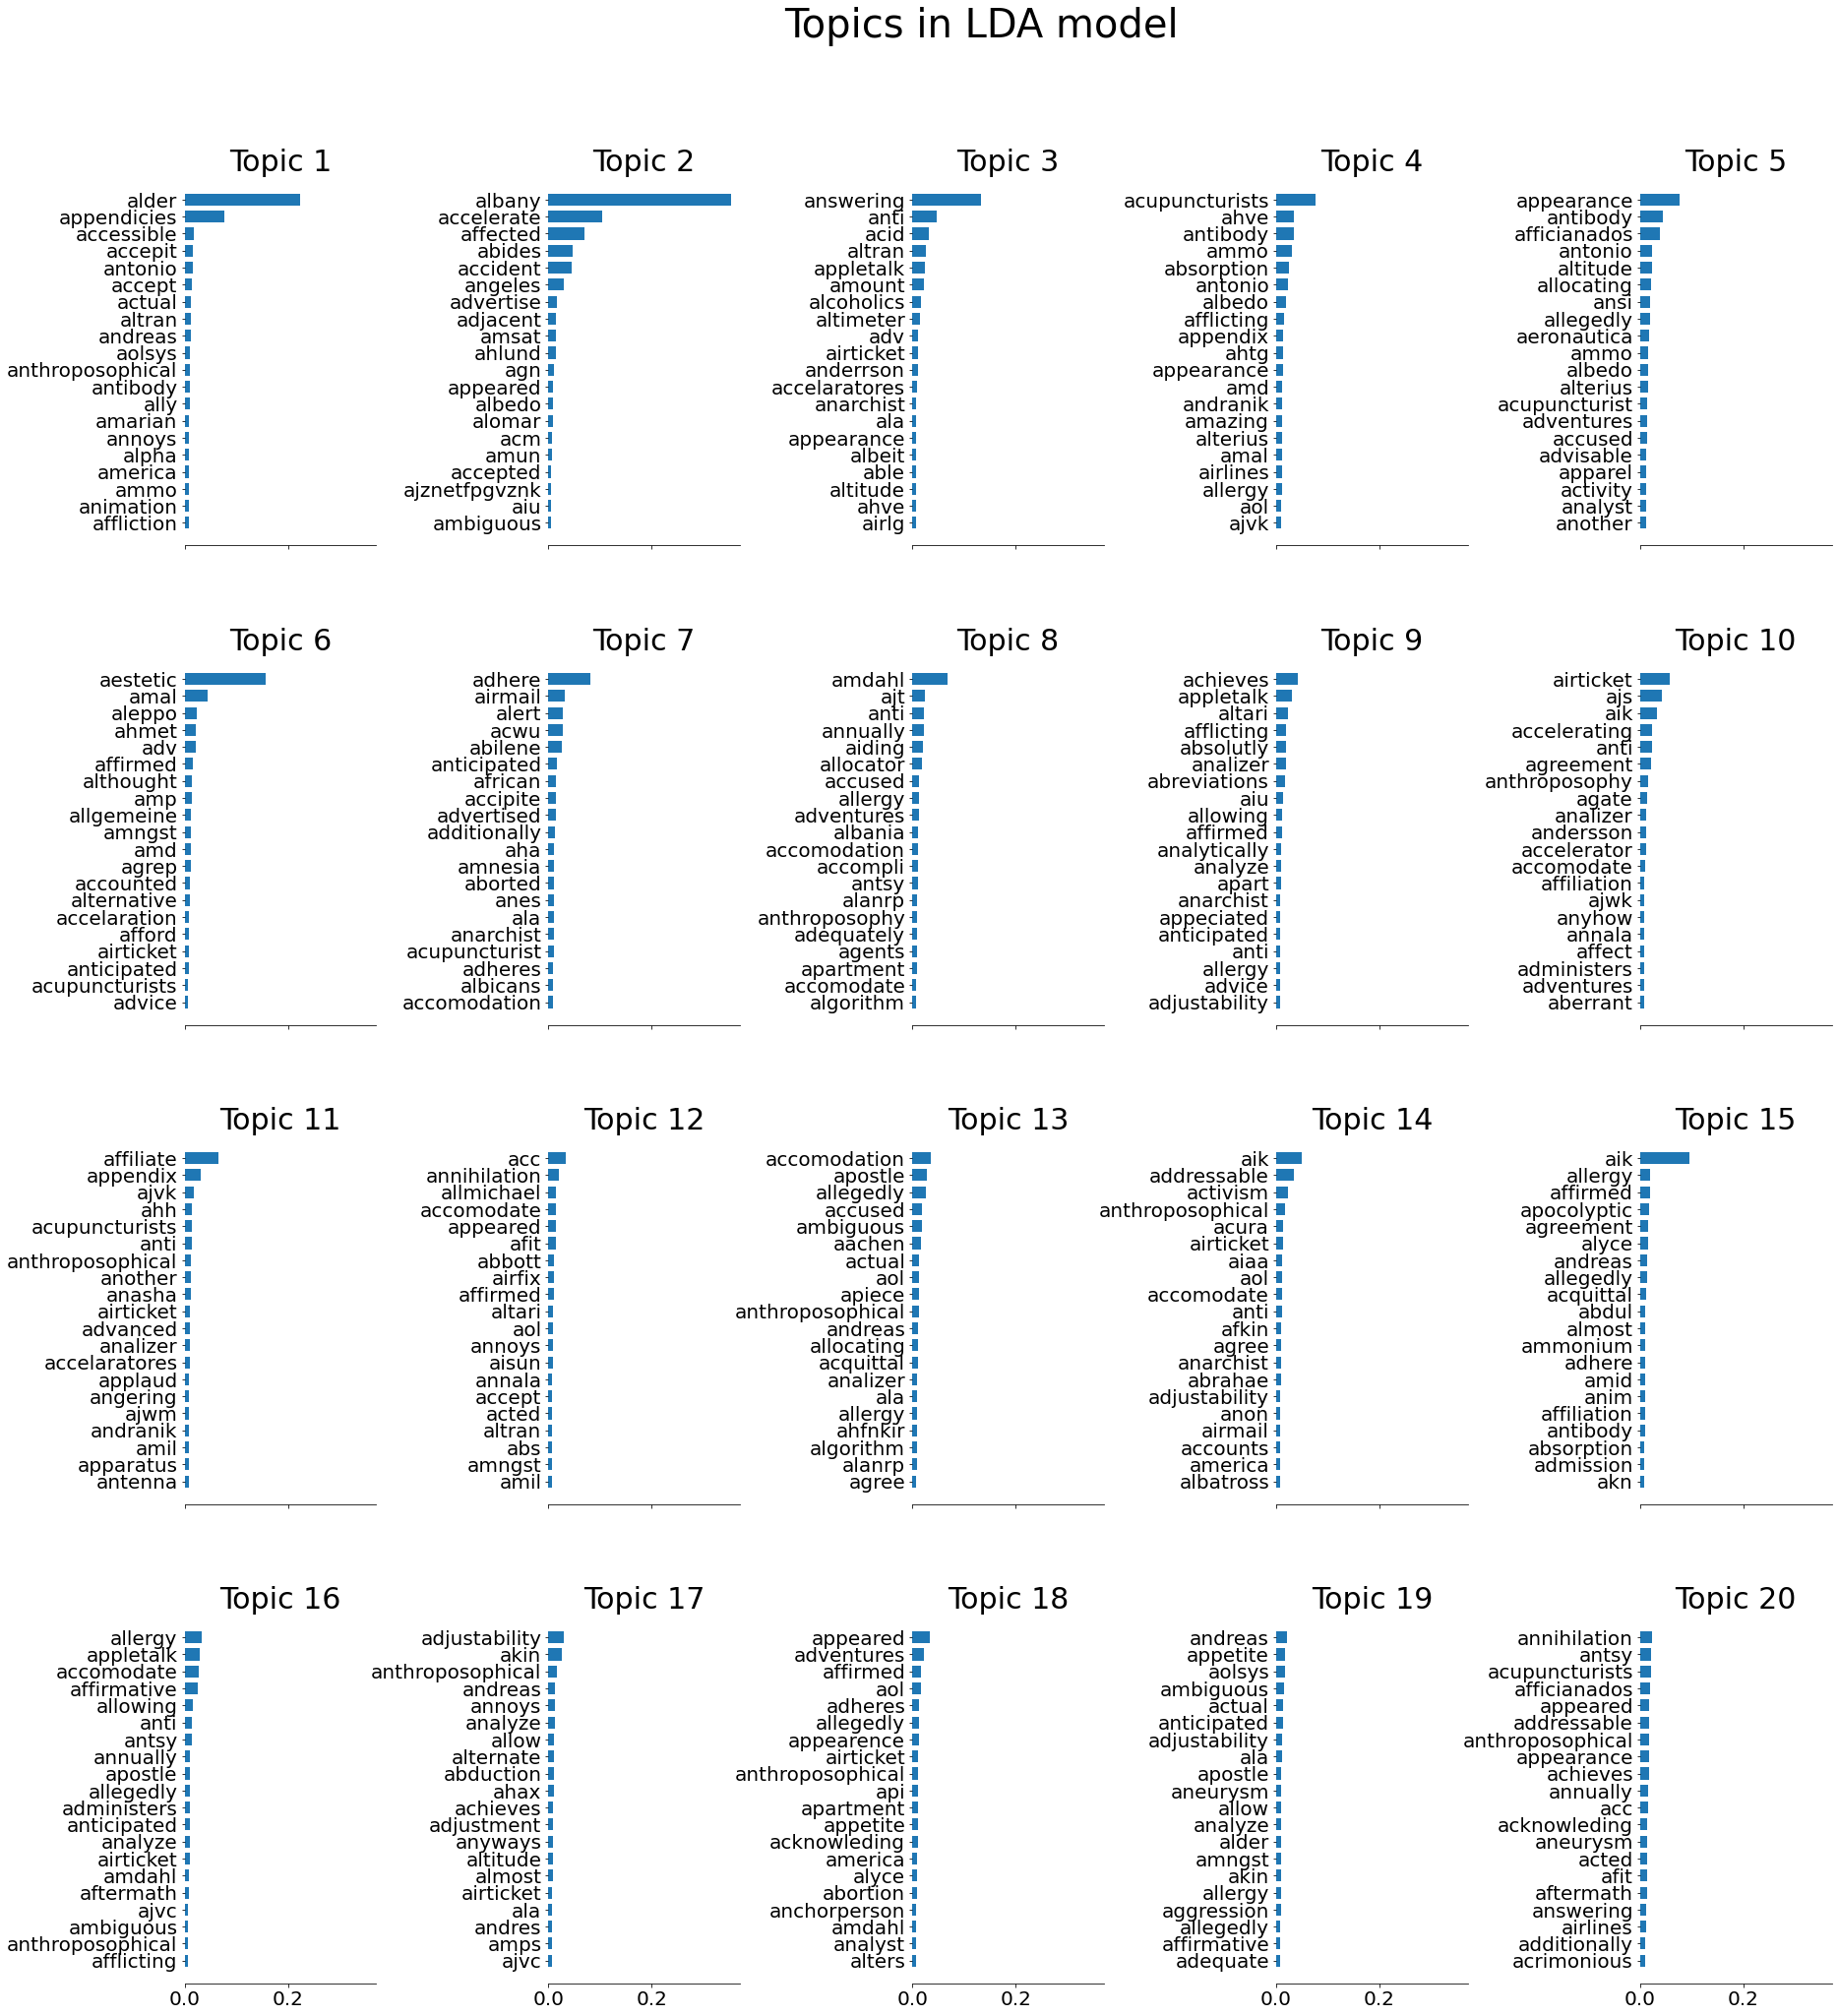

In [29]:
plot_top_words(lda_tensor, tf_feature_names, n_top_words, "Topics in LDA model")

/Users/arianeyu/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


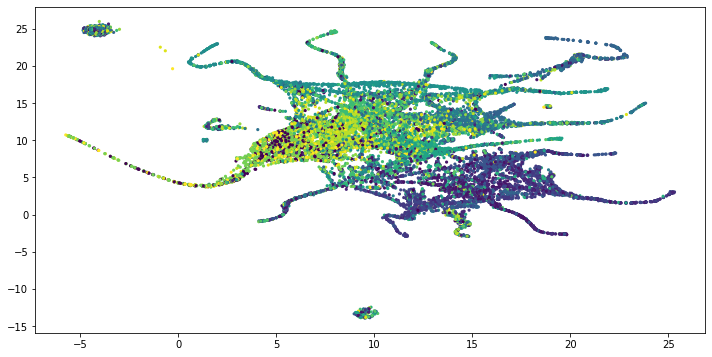

In [30]:
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(lda_tensor.fit_transform(tf_matrix_full)) 
plt.figure(figsize=(12,6)) 
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target, 
s = 10, # size 
edgecolor='none' ) 
plt.show()